# CS 132 21.2 Machine Project
# Florida Traffic and Air Quality Index Analysis Notebook

## About this Notebook
This Python notebook is dedicated for the following steps in CS 132 21.2 project:
- Cleaning and processing traffic and AQI data further
- Exploratory data analysis
- Using linear regression to model the increase in AQI per amount of cars that are added
- Visualizing the data

This notebook/report is prepared by:
- James Matthew G. Borines
- Alyssa Beatrice A. Diokno
- Derryn Joi O. Martirez
- Jan Albert D. Quidet

## Preliminaries

The following external libraries used in this notebook is given by the list below. Make sure that the following are installed in your machine before running subsequent cells. These libraries were installed via `pip`: `pip install <library-name>`
- `pandas`
- `seaborn`

Run the cell below to load all dependencies and libraries

In [510]:
#lahat ng libraries na gagamitin natin, paki-lagay na lang yung import statements dito
import pandas as pd
import seaborn as sns

## Loading Datasets

We define two dataframe variables, which will be used throughout the duration of this notebook/report:
- `traffic_data`: pertains to the traffic data in Florida
- `airq_data`: pertains to the air quality data in Florida

Both of these datasets are preprocessed beforehand.

In [511]:
traffic_data = pd.read_csv('florida_traffic_data.csv')
weather_data = pd.read_csv('florida_weather_data.csv')
airq_data = pd.read_csv('florida_aqi_data.csv')

In [512]:
traffic_data.head()

,01/01,01/02,01/03,01/04,01/05,01/06,01/07,01/08,01/09,01/10,...,06/29,06/30,07/01,07/02,07/03,07/04,07/05,07/06,07/07,COUNTY
0,93577,130263,137751,110805,101379,120925,117384,122200,125525,133191,...,98897,99327,102682,111925,103217,71816,81094,99167,96529,Charlotte
1,27107,42907,45616,33070,32908,41046,43203,44375,45091,47476,...,35886,38459,43349,46666,45621,34863,31295,40701,42047,Citrus
2,236551,325565,338452,284312,264567,314038,304515,310861,318654,335605,...,216490,214114,220510,234920,218501,147360,165241,213985,207772,Collier
3,15620,22611,24145,18099,18292,22028,21675,22571,23220,25535,...,18203,18602,18885,20446,18055,12816,14553,18841,17845,Desoto
4,3437,4675,5495,3620,3310,4655,4581,4488,4883,5273,...,3963,3847,4235,4159,3614,2638,2901,3808,3913,Glades


The preprocessed traffic data contains the following information:
- Each row represents a county in Florida that has traffic data
- Each column represents a date in which traffic data was recorded
- Each cell represents the total volume of traffic for a particular county on a particular date.

In [513]:
weather_data.head()

,COUNTY,DATE,PRECIPITATION,MEAN TEMP
0,Alachua,01/01,0.00000,52.5
1,Alachua,01/02,0.00000,61.5
2,Alachua,01/03,0.00001,73.0
3,Alachua,01/04,0.68000,63.0
4,Alachua,01/05,0.00000,50.0


The preprocessed weather data contains the following information:

- The `COUNTY` column signifies the county in which weather data is recorded
- The `DATE` column signifies the date in which weather data is recorded
- The `PRECIPITATION` column signifies the average precipitation level for the county at that date (in inches)
- The `MEAN TEMP` column signifies the average temperature for the county at that date (in degrees Fahrenheit)

In [514]:
airq_data.head()

,COUNTY,DATE,AQI,PARAMETER
0,Alachua,01/03,35,PM2.5
1,Alachua,01/08,52,PM2.5
2,Alachua,01/09,48,PM2.5
3,Alachua,01/11,38,PM2.5
4,Alachua,01/12,37,PM2.5


The preprocessed air quality data contains the following information:
- The `county Name` column signifies the county in which air quality data is recorded
- The `Date` column signifies the date in which air quality data is recorded
- The `AQI` column signifies the Air Quality Index recorded for that particular county at a particular date
- The `Defining Parameter` column defines the *recorded parameter* to which AQI is recorded. The original dataset contains other defining parameters, such as *Ozone*, *CO*, and *SO2*.

Each cell represents the PM2.5 air quality index measurement for a particular county and particular date.

# PART 1: Preprocessing Data

There are only certain counties that have been recorded by the air quality data of Florida. We can then filter the traffic data so that its counties is consistent with the recorded counties in the air quality data.

In [515]:
#determine counties in the air quality data
county_airq = airq_data['COUNTY'].unique()

county_airq

array(['Alachua', 'Baker', 'Bay', 'Brevard', 'Broward', 'Citrus',
       'Collier', 'Columbia', 'Duval', 'Escambia', 'Hamilton',
       'Hillsborough', 'Holmes', 'Lee', 'Leon', 'Marion', 'Martin',
       'Miami-Dade', 'Nassau', 'Orange', 'Palm Beach', 'Pinellas', 'Polk',
       'Santa Rosa', 'Sarasota', 'Seminole', 'Volusia', 'Wakulla'],
      dtype=object)

In [516]:
#determine counties in traffic data
county_traffic = traffic_data['COUNTY'].unique()

county_traffic

array(['Charlotte', 'Citrus', 'Collier', 'Desoto', 'Glades', 'Hendry',
       'Hernando', 'Highlands', 'Hillsborough', 'Lake', 'Lee', 'Manatee',
       'Pasco', 'Pinellas', 'Polk', 'Sarasota', 'Sumter', 'Alachua',
       'Baker', 'Bradford', 'Columbia', 'Dixie', 'Hamilton', 'Lafayette',
       'Levy', 'Madison', 'Marion', 'Suwannee', 'Taylor', 'Bay',
       'Calhoun', 'Escambia', 'Franklin', 'Gadsden', 'Gulf', 'Holmes',
       'Jackson', 'Jefferson', 'Leon', 'Liberty', 'Okaloosa',
       'Santa Rosa', 'Wakulla', 'Walton', 'Washington', 'Brevard', 'Clay',
       'Duval', 'Flagler', 'Nassau', 'Orange', 'Putnam', 'Seminole',
       'St. Johns', 'Volusia', 'Broward', 'Miami-Dade', 'Indian River',
       'Martin', 'Monroe', 'Osceola', 'Palm Beach', 'St. Lucie',
       "Florida's Turnpike"], dtype=object)

In [517]:
county_weather = weather_data['COUNTY'].unique()

county_weather

array(['Alachua', 'Baker', 'Bay', 'Brevard', 'Broward', 'Citrus',
       'Collier', 'Columbia', 'Duval', 'Escambia', 'Hamilton',
       'Hillsborough', 'Lee', 'Leon', 'Marion', 'Martin', 'Miami-Dade',
       'Nassau', 'Orange', 'Palm Beach', 'Pinellas', 'Polk', 'Sarasota',
       'Seminole', 'Volusia'], dtype=object)

In [518]:
#determine counties that are common for both datasets
common_counties = list(set(county_airq).intersection(set(county_traffic)))
common_counties = list(set(common_counties).intersection(set(county_weather)))

print(common_counties)

['Polk', 'Collier', 'Martin', 'Bay', 'Alachua', 'Escambia', 'Sarasota', 'Citrus', 'Brevard', 'Duval', 'Seminole', 'Hillsborough', 'Lee', 'Palm Beach', 'Miami-Dade', 'Volusia', 'Nassau', 'Baker', 'Marion', 'Orange', 'Pinellas', 'Columbia', 'Broward', 'Hamilton', 'Leon']


The variable `common_counties` represent counties in Florida that are common for both air quality and traffic data. We could now filter both the traffic and air quality data according to their common counties, represented by the `common_counties` variable.

In [519]:
#filter the traffic data by common counties
traffic_data = traffic_data[traffic_data['COUNTY'].isin(common_counties)]

traffic_data.sort_values('COUNTY', inplace = True)
traffic_data

,01/01,01/02,01/03,01/04,01/05,01/06,01/07,01/08,01/09,01/10,...,06/29,06/30,07/01,07/02,07/03,07/04,07/05,07/06,07/07,COUNTY
17,114200,154629,166054,151168,146477,138321,128157,127949,134169,147862,...,125297,122412,131997,143193,137491,90080,118842,131855,120127,Alachua
18,2071,2796,3081,2526,2375,2565,2627,2745,2853,3272,...,2965,2929,3014,3288,3183,2641,2550,2857,2707,Baker
29,92354,139450,141158,111372,91151,139712,144079,144889,145925,154921,...,138276,154222,139730,166732,155771,124145,123179,133025,145192,Bay
45,261851,367668,401305,332429,299054,346140,321507,325505,332772,370856,...,287127,291592,295687,320577,305800,215883,242171,281311,275538,Brevard
55,654055,855843,900897,785596,702080,873355,902844,893983,908921,925687,...,715555,734498,736393,764052,712455,522985,494879,697840,709431,Broward
1,27107,42907,45616,33070,32908,41046,43203,44375,45091,47476,...,35886,38459,43349,46666,45621,34863,31295,40701,42047,Citrus
2,236551,325565,338452,284312,264567,314038,304515,310861,318654,335605,...,216490,214114,220510,234920,218501,147360,165241,213985,207772,Collier
20,117423,148119,159311,147044,140417,110480,96994,97715,104840,119029,...,115280,108944,122022,144884,139546,87239,136401,126308,105119,Columbia
47,359461,572172,602746,453034,391058,546093,553083,558678,563886,590374,...,318008,405390,426355,445997,455776,322478,335327,471132,471482,Duval
31,171980,264689,274006,229805,187136,265397,268369,269910,276625,286133,...,242656,246983,254142,290255,267312,196559,198003,253754,245818,Escambia


In [520]:
#filter the air quality data by common counties
airq_data = airq_data[airq_data['COUNTY'].isin(common_counties)]

airq_data

,COUNTY,DATE,AQI,PARAMETER
0,Alachua,01/03,35,PM2.5
1,Alachua,01/08,52,PM2.5
2,Alachua,01/09,48,PM2.5
3,Alachua,01/11,38,PM2.5
4,Alachua,01/12,37,PM2.5
...,...,...,...,...
2079,Volusia,06/29,53,PM2.5
2080,Volusia,06/30,45,PM2.5
2081,Volusia,07/01,45,PM2.5
2082,Volusia,07/02,48,PM2.5


In [521]:
weather_data = weather_data[weather_data['COUNTY'].isin(common_counties)]

weather_data

,COUNTY,DATE,PRECIPITATION,MEAN TEMP
0,Alachua,01/01,0.000000,52.500000
1,Alachua,01/02,0.000000,61.500000
2,Alachua,01/03,0.000010,73.000000
3,Alachua,01/04,0.680000,63.000000
4,Alachua,01/05,0.000000,50.000000
...,...,...,...,...
9145,Volusia,12/27,0.000000,45.500000
9146,Volusia,12/28,0.000000,54.333333
9147,Volusia,12/29,0.006667,60.833333
9148,Volusia,12/30,0.000003,63.666667


# PART 2: Exploratory Data Analysis

Both air quality and traffic data from selected counties in Florida state have been preprocessed/cleaned. We can then visualize the trends both in traffic and air quality data in selected counties in Florida.

## PART 2.1: Filtering DataFrame by County

We can then filter our dataframes according to a specific county. Let us define a function `filter_data` that performs the following tasks:
- Filter the air quality dataset to a specified county
- Filter the traffic dataset to a specified county
- Filter recorded dates, since there are particular dates that are not present in the traffic data, weather data, or air quality data
- Combine datasets into a single dataframe

The function takes in the traffic dataset (given by `traffic`), the air quality dataset (given by `air_quality`), and the specific county (given by `county`). This function will output a **new `pandas` DataFrame** such that each row represents the traffic volume and air quality index for a particular county at a particular date. An example, template dataframe is given below:

|Date|AQI|traffic_volume|precipitation|temperature|
|----|---|--------------|-------------|-----------|
|01/01|XXX|XXXXX|XXXXX|XXXXX|
|01/02|YYY|YYYYY|YYYYY|YYYYY|
|01/03|ZZZ|ZZZZZ|ZZZZZ|ZZZZZ|
|...|...|...|...|...|

In [522]:
def filter_data(traffic, air_quality, weather, county):
    #create temporary datasets such that air quality and traffic data are filtered by specific county
    temp1 = air_quality[air_quality['COUNTY'] == county]
    temp2 = traffic[traffic['COUNTY'] == county]
    temp3 = weather[weather['COUNTY'] == county]
    
    #filter recorded dates for both air quality and traffic data
    date1 = list(temp2.columns[1:])
    date2 = list(temp1['DATE'])
    date3 = list(temp1['DATE'])
    
    #determine the common dates for both datasets using set intersection
    common_dates = list(set(date1).intersection(set(date2)))
    common_dates = list(set(common_dates).intersection(set(date3)))
    common_dates.sort() #sort the common dates
    
    #further filter the temporary datasets such that the dates are in common dates
    temp1 = temp1[temp1['DATE'].isin(common_dates)]
    temp2 = temp2[common_dates]
    temp3 = temp3[temp3['DATE'].isin(common_dates)]
    
    #define new dataframe to_return that is copied from AQI data
    to_return = temp1[['DATE', 'AQI', 'COUNTY']].copy(deep = True)
    to_return = to_return.merge(temp3[['DATE','PRECIPITATION','MEAN TEMP']], how='inner', on='DATE')
    
    #record the traffic volume values per common date, append it to tem_lis
    tem_lis = []
    for i in common_dates:
        tem_lis.append(temp2[i].values[0])
    
    to_return['traffic_volume'] = tem_lis #add tem_lis as a new column in to_return
    to_return = to_return.reset_index(drop = True) #reset index
    
    return to_return

We can test our newly-created function to a specific county. **For the cells below, you can change the value of `county` variable and run the cell to see the results for a specific county.** You may check for the list of common counties in both datasets by looking at the `common_counties` variable.

In [523]:
print(common_counties)

['Polk', 'Collier', 'Martin', 'Bay', 'Alachua', 'Escambia', 'Sarasota', 'Citrus', 'Brevard', 'Duval', 'Seminole', 'Hillsborough', 'Lee', 'Palm Beach', 'Miami-Dade', 'Volusia', 'Nassau', 'Baker', 'Marion', 'Orange', 'Pinellas', 'Columbia', 'Broward', 'Hamilton', 'Leon']


In [524]:
#You may change the county variable according to a value in the common_counties variable
county = "Collier"

test_var = filter_data(traffic_data, airq_data, weather_data, county)
test_var

,DATE,AQI,COUNTY,PRECIPITATION,MEAN TEMP,traffic_volume
0,01/03,29,Collier,0.0,67.5,338452
1,01/10,37,Collier,0.0,66.0,335605
2,01/11,45,Collier,0.0,71.5,278819
3,01/12,37,Collier,0.0,77.0,253325
4,01/13,34,Collier,0.0,76.0,310912
...,...,...,...,...,...,...
74,06/29,58,Collier,0.1,77.5,216490
75,06/30,62,Collier,0.0,78.5,214114
76,07/01,64,Collier,0.0,83.0,220510
77,07/02,62,Collier,0.0,86.5,234920


## PART 2.2: Exploring the Correlation Between Traffic and AQI

The `.corr()` method of `pandas` returns a dataframe that measures the correlation between two or more different variables. We want to know specifically how well-correlated the traffic data and AQI are for all common counties. Let us define a function `corr_measure` that returns the correlation value between the traffic data and AQI using Pearson's correlation coefficient.

The values of the correlation coefficient determine the strength of association between the two variables. The table below shows the scale of correlation based on their Pearson's correlation coefficient.

|Scale of correlation coefficient| Value |
|--------------------------------|-------|
| $0<r \leq 0.19$                |Very Low|
|$0.2 \leq r \leq 0.39$          |Low|
|$0.4 \leq r \leq 0.59$          |Moderate|
|$0.6 \leq r \leq 0.79$          |High|
|$0.8 \leq r \leq 1.0$           |Very High|

The function `corr_measure` takes in the following variables:
- `x_axis`, corresponding to the name of the x-axis (string) => traffic volume
- `y_axis`, corresponding to the name of the y-axis (string) => AQI
- `src`, the pandas dataframe source

This function will return a tuple corresponding to the correlation coefficient, the scale, and the direction of the correlation based on the computed correlation coefficient.

In [525]:
def corr_measure(x_axis, y_axis, src):
    temp = src[[x_axis, y_axis]].corr() #construct correlation dataframe
    correlation_value = temp.iloc[0][1] #since this is a 2 x 2 dataframe, iloc[0][1] = iloc[1][0]
    str = ""
    
    #determine the strength of correlation based on the correlation coefficient
    if 0.8 <= abs(correlation_value) <= 1.0:
        str = "very high"
    elif 0.6 <= abs(correlation_value) <= 0.79:
        str = "high"
    elif 0.4 <= abs(correlation_value) <= 0.59:
        str = "moderate"
    elif 0.2 <= abs(correlation_value) <= 0.39:
        str = "low"
    elif 0 <= abs(correlation_value) <= 0.19:
        str = "very low"
    
    #determine direction of correlation based on the correlation coefficient
    if correlation_value > 0:
        str += " positive relationship"
    elif correlation_value < 0:
        str += " negative relationship"
    
    #return a tuple of correlation coefficient & description of correlation
    return temp.iloc[0][1], str

We then iterate the function over all common counties to determine the strength of the correlation of traffic data and AQI, and sort the results according to the absolute value of their correlation value.

In [526]:
results = []

for i in common_counties:
    test_df = filter_data(traffic_data, airq_data, weather_data, i)
    con, cor_stat = corr_measure('traffic_volume', 'AQI', test_df)
    results.append((i, con, cor_stat))

In [527]:
results.sort(key = lambda x: abs(x[1]), reverse = True)

for i in range(5):
    print(results[i])

('Leon', -0.43795223059571814, 'moderate negative relationship')
('Pinellas', -0.4143257330217335, 'moderate negative relationship')
('Lee', -0.40905459295589935, 'moderate negative relationship')
('Brevard', -0.3759101195122419, 'low negative relationship')
('Collier', -0.29788094632917805, 'low negative relationship')


The top 5 counties with the strongest correlation among all common counties have moderate to low relationships.
1. Leon County => -0.43795 (moderate negative)
2. Pinellas => -0.31433 (moderate negative)
3. Lee => -0.40905 (moderate negative)
4. Brevard => -0.37591 (low negative)
5. Collier => -0.29788 (low negative)

Surprisingly, the direction of the correlation for the top 5 counties are **all negative**, which means that AQI tends to *decrease* whenever the traffic volume *increases* (inverse relationship). This relationship deviates from the assumption that AQI is expected to be directly proportional to the traffic volume. 

## PART 2.3: Scatterplots of Top 5 Counties in Terms of Correlation Coefficient

Let us define a function `scatplot` that generates a scatterplot for the traffic and AQI data of a county. The scatterplot was generated using `seaborn`.

In [528]:
def scatplot(x_axis, y_axis, src, county):
    sns.lmplot(x = x_axis, y = y_axis, data = src).set(title='Scatterplot of Traffic vs. AQI Data for {0}'.format(county))

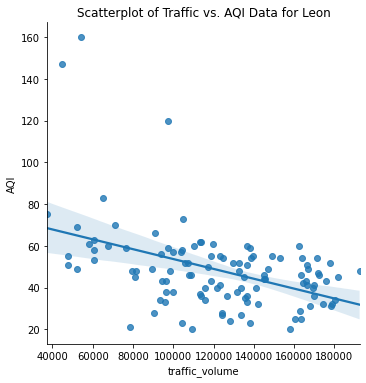

In [529]:
#scatterplot for Leon
sp_df = filter_data(traffic_data, airq_data, weather_data, "Leon")
scatplot("traffic_volume", "AQI", sp_df, "Leon")

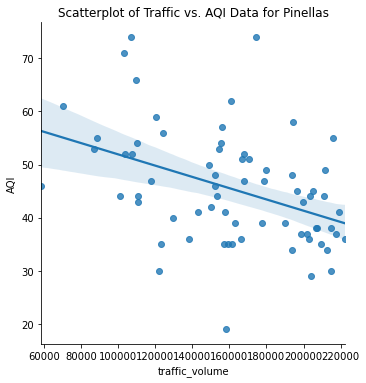

In [530]:
#scatterplot for Pinellas
sp_df = filter_data(traffic_data, airq_data, weather_data, "Pinellas")
scatplot("traffic_volume", "AQI", sp_df, "Pinellas")

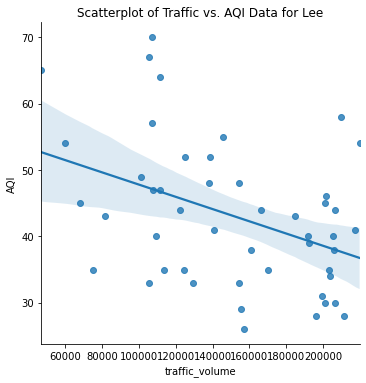

In [531]:
#scatterplot for Leon
sp_df = filter_data(traffic_data, airq_data, weather_data, "Lee")
scatplot("traffic_volume", "AQI", sp_df, "Lee")

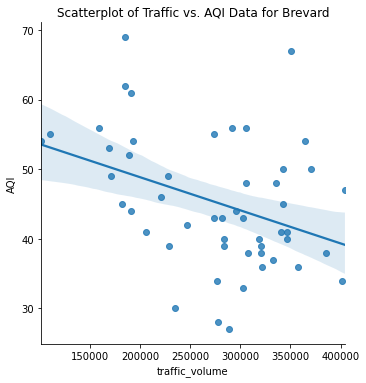

In [532]:
#scatterplot for Leon
sp_df = filter_data(traffic_data, airq_data, weather_data, "Brevard")
scatplot("traffic_volume", "AQI", sp_df, "Brevard")

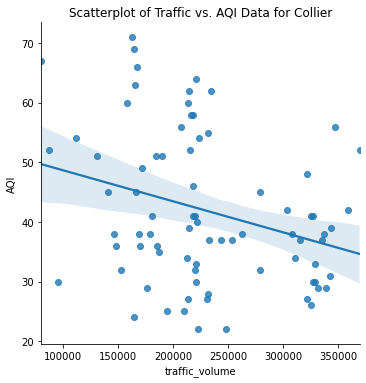

In [533]:
#scatterplot for Leon
sp_df = filter_data(traffic_data, airq_data, weather_data, "Collier")
scatplot("traffic_volume", "AQI", sp_df, "Collier")

## PART 2.4: Analysis of Correlation and Preparation for Modelling